# Revision XOR

In [1]:
import numpy as np
from scipy.linalg import lstsq
import matplotlib.pyplot as plt

### Gaussian RBF

In [2]:
def rbf(x, c, s):
    return np.exp(-np.linalg.norm(x - c, axis=1) ** 2 / (2 * s**2))

### Network

In [3]:
class RBFNetwork:
    def __init__(self, centers, sigma, regularization=0):
        self.centers = centers
        self.sigma = sigma
        self.regularization = regularization
        self.weights = None

    def _construct_phi(self, X):
        phi = np.zeros((X.shape[0], len(self.centers)))
        for idx, c in enumerate(self.centers):
            phi[:, idx] = rbf(X, c, self.sigma)
        return phi

    def fit(self, X, y):
        phi = self._construct_phi(X)
        if self.regularization > 0:
            reg_mat = self.regularization * np.eye(phi.shape[1])
            self.weights = np.linalg.inv(phi.T @ phi + reg_mat) @ phi.T @ y
        else:
            self.weights, _, _, _ = lstsq(phi, y)

    def predict(self, X):
        phi = self._construct_phi(X)
        return phi @ self.weights

### Train & Test

In [4]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

### Without regularization

In [5]:
centers = X.copy()
sigma = 1.0
regularization = 0

rbf_net = RBFNetwork(centers, sigma, regularization)
rbf_net.fit(X, y)

y_pred = rbf_net.predict(X)

print(f"Predictions (No Regularization): {y_pred}")

Predictions (No Regularization): [2.88657986e-15 1.00000000e+00 1.00000000e+00 4.44089210e-16]


### With Regularization

In [6]:
centers = X.copy()
sigma = 1.0
regularization = 0.1

rbf_net_reg = RBFNetwork(centers, sigma, regularization)
rbf_net_reg.fit(X, y)

y_pred_reg = rbf_net_reg.predict(X)

print(f"Predictions (With Regularization): {y_pred_reg}")

Predictions (With Regularization): [0.3959327  0.58927715 0.58927715 0.3959327 ]


### Plot

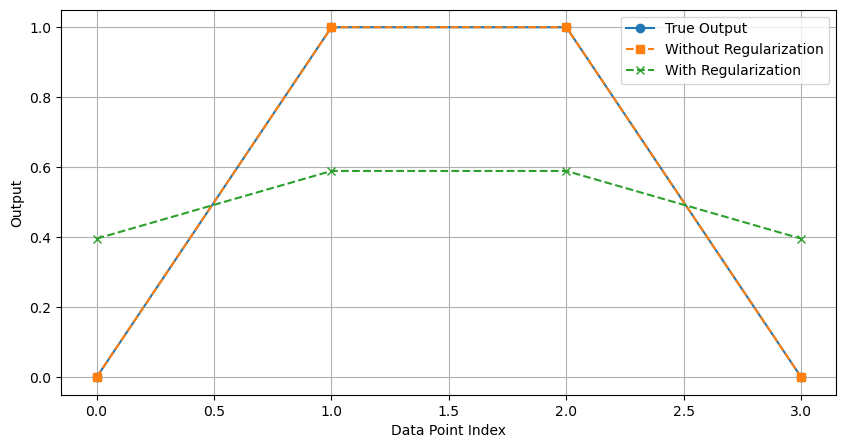

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(y)), y, "o-", label="True Output")
plt.plot(range(len(y_pred)), y_pred, "s--", label="Without Regularization")
plt.plot(range(len(y_pred_reg)), y_pred_reg, "x--", label="With Regularization")
plt.xlabel("Data Point Index")
plt.ylabel("Output")
plt.legend()
plt.grid()
plt.show()